In [26]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor 
from pyswarm import pso
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from neupy import algorithms
import tools as t

from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split

from neupy import algorithms, layers, estimators, environment

In [27]:
print("\ndataset of power\n")
data=pd.read_csv('data2.csv') #load dataset and save in data object of panda library

data.columns=['1','2','3','4','5'] # here we set the names of columns so that
                                #  we split the class labels from dataset
X=np.asarray(data[['1','2','3','4']].dropna()) # split data points from class
Y=np.asarray(data['5'].dropna()) # splitting of class values
print ("Data Set Dimensions =", X.shape, " True Class labels dimensions =", Y.shape)


dataset of power

Data Set Dimensions = (9568, 4)  True Class labels dimensions = (9568,)


# PreProcessing

In [28]:
data_scaler = preprocessing.MinMaxScaler((-10, 10))
target_scaler = preprocessing.MinMaxScaler()

X = data_scaler.fit_transform(X) # preprocessing of X
Y = target_scaler.fit_transform(Y) # preprocessing of Y

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.70) # splitting of data 70:30
print ("X_Train Dimensions =", x_train.shape, " Y_Train Dimensions =", y_train.shape)
print ("X_TEST Dimensions  =", x_test.shape, " Y_Test Dimensions  =", y_test.shape)

X_Train Dimensions = (6697, 4)  Y_Train Dimensions = (6697,)
X_TEST Dimensions  = (2871, 4)  Y_Test Dimensions  = (2871,)


/home/umair/.local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/umair/.local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


# Feature Selection

In [29]:
# feature selection on the bases of redundent filter
# here we cannot use pca for irrelenacy because it just work with eigen vectors

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)
print (X.shape)

(9568, 4)


# RBF

In [44]:

nw = algorithms.GRNN(std=0.5, verbose=False)
nw.train(x_train, y_train)

y_predicted = nw.predict(x_test)
#errors = estimators.mse(y_predicted, y_test)
#print(errors)
y_predicted = np.reshape(y_predicted,(2871,1))
y_test = np.reshape(y_test,(2871,1))
#y_train = nw.predict(x_train)
err = 0.0
err2 = 0.0
for i in range(y_predicted.shape[0]):
    err = err + ((y_test[i][0] - y_predicted[i][0])**2)
    err2 = err2 + abs(y_test[i][0] - y_predicted[i][0])
    #print (y_test[i][0],y_predicted[i][0],err)
err = err/float(y_test.shape[0])
err2 = err2/float(y_test.shape[0])
print("MSE = ",err)
print("MAE = ",err2)

MSE =  0.00344067927497
MAE =  0.0463146406296


# SVR

In [45]:

svr = SVR(C=1.0, coef0=1.0, degree=3, epsilon=0.2, gamma='auto',
          kernel='linear',max_iter=10000, shrinking=True, tol=0.001, verbose=False)

svr.fit(x_train, y_train) 
y_pred_svr = svr.predict(x_test)
#y_train = svr.predict(x_train)
#param = svr.coef_
#print(param)
err = 0
err2 = 0
for i in range(y_test.shape[0]):
    err = err + ((y_test[i] - y_pred_svr[i])**2)
    err2 = err2 + abs(y_test[i] - y_pred_svr[i])
err = err/float(y_test.shape[0])
err2 = err2/float(y_test.shape[0])
print("MSE = ",err)
print("MAE = ",err2)

MSE =  [ 0.01984974]
MAE =  [ 0.12057206]


# LMNN

In [32]:

lmnn = algorithms.LevenbergMarquardt(
    connection=[
        layers.Input(4),
        #layers.Sigmoid(50),
        #layers.Sigmoid(10),
        layers.Sigmoid(3),
        layers.Sigmoid(1),
    ],
    verbose=False,
)

lmnn.train(x_train, y_train, epochs=1) # y_train is updated by SVR
y_pred_lmnn = lmnn.predict(x_test)
#y_train = lmnn.predict(x_train)

#y_test = target_scaler.inverse_transform(y_test.reshape((-1, 1)))
#y_predict = target_scaler.inverse_transform(y_predict).T.round(1)
#error = estimators.rmsle(y_predict, y_test)
#error2 = estimators.mse(y_predict, y_test)
#print("MSE = {}".format(error))

err = 0
err2 = 0
for i in range(y_test.shape[0]):
    err = err + ((y_test[i] - y_pred_lmnn[i])**2)
    err2 = err2 + abs(y_test[i] - y_pred_lmnn[i])
err = err/float(y_test.shape[0])
err2 = err2/float(y_test.shape[0])
print("MSE = ",err)
print("MAE = ",err2)

MSE =  [ 0.02106019]
MAE =  [ 0.12309206]


# BFGSNN

In [33]:
#create neural net regressor
bfgs = MLPRegressor(hidden_layer_sizes=(4, 3), activation='tanh', solver='lbfgs',
                   batch_size='auto', learning_rate='adaptive', learning_rate_init=0.001, power_t=0.5,
                   max_iter=10000, shuffle=False, random_state=None, tol=0.0001, verbose=False, 
                   warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=True,
                   validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

bfgs.fit(x_train, y_train)
y_pred_bfgsnn = bfgs.predict(x_test)
y_train = bfgs.predict(x_train)

param_2 = bfgs.coefs_

err = 0
err2 = 0
for i in range(y_test.shape[0]):
    err = err + ((y_test[i] - y_pred_bfgsnn[i])**2)
    err2 = err2 + abs(y_test[i] - y_pred_bfgsnn[i])
err = err/float(y_test.shape[0])
err2 = err2/float(y_test.shape[0])
print("MSE = ",err)
print("MAE = ",err2)

MSE =  [ 0.0031542]
MAE =  [ 0.04437875]


# BRNN

In [34]:
#create neural net regressor
# in adam with alphs becomes BRNN --> alpha helps us to avoid overfitting

brnn = MLPRegressor(hidden_layer_sizes=(4, 3), activation='tanh', solver='adam',alpha=0.0001,
                   batch_size='auto', learning_rate='adaptive', learning_rate_init=0.0001, power_t=0.5,
                   max_iter=10000, shuffle=False, random_state=None, tol=0.0001, verbose=False, 
                   warm_start=False, momentum=0.8, nesterovs_momentum=True, early_stopping=True,
                   validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

brnn.coefs_ = param_2

brnn.fit(x_train, y_train) # y_train is updated by LMNN
y_pred_brnn = brnn.predict(x_test)
y_train = brnn.predict(x_train)

err = 0
err2 = 0
for i in range(y_test.shape[0]):
    err = err + ((y_test[i] - y_pred_brnn[i])**2)
    err2 = err2 + abs(y_test[i] - y_pred_brnn[i])
err = err/float(y_test.shape[0])
err2 = err2/float(y_test.shape[0])
print("MSE = ",err)
print("MAE = ",err2)

MSE =  [ 0.00336689]
MAE =  [ 0.04572167]


# PSO

In [35]:
def func(x):

    w1 = x[0:4]
    b = 1.0

    loss = np.sum(abs((np.dot(X,w1) + b) - Y))
    loss = loss/float(Y.shape[0])
    return loss

x  = []
lb = []
ub = []

def epso(x):
    for i in range(4):
        pass
        #x = [1,1,1,1]
        #lb = [-10,-10,-10,-10]
        #ub = [10,10,10,10]

    xopt , fopt = pso(func, lb, ub, ieqcons=[], f_ieqcons=None, args=(), kwargs={},
                swarmsize=100, omega=0.5, phip=0.5, phig=0.5, maxiter=10000, minstep=1e-8,
                minfunc=1e-8, debug=False)

    #print (xopt)
    print (fopt)

# Results

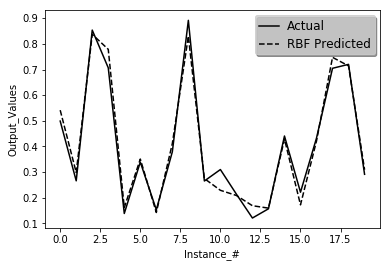

In [36]:


actual_err = []
rbf_err = []
br_err = []
bfgs_err = []
lm_err = []
svr_err = []

for i in range(10,len(y_test),150):
    
    actual_err.append(y_test[i])
    rbf_err.append(y_predicted[i]) #RBF
    br_err.append(y_pred_brnn[i]) #BR
    lm_err.append(y_pred_lmnn[i]) #LM
    bfgs_err.append(y_pred_bfgsnn[i]) #BFSG
    svr_err.append(y_pred_svr[i])  #SVR
    
t = np.arange(0, len(svr_err),  1)

# Example data
a = t
b = actual_err
c = svr_err
d = rbf_err

# Create plots with pre-defined labels.
# Alternatively, you can pass labels explicitly when calling `legend`.
fig, ax = plt.subplots()
ax.plot(a, b, 'k', label='Actual')
ax.plot(a, d, 'k--', label='RBF Predicted')
plt.ylabel("Output_Values")
plt.xlabel("Instance_#")
# Now add the legend with some customizations.
legend = ax.legend(loc='upper right', shadow=True)

# The frame is matplotlib.patches.Rectangle instance surrounding the legend.
frame = legend.get_frame()
frame.set_facecolor('0.80')

# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')

for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.show()

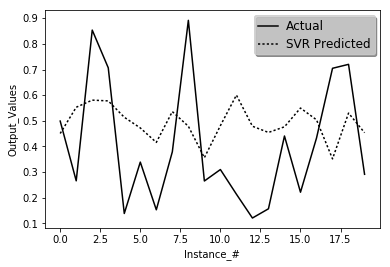

In [37]:

# Create plots with pre-defined labels.
# Alternatively, you can pass labels explicitly when calling `legend`.
fig, ax = plt.subplots()
ax.plot(a, b, 'k', label='Actual')
ax.plot(a, c, 'k:', label='SVR Predicted')
# Now add the legend with some customizations.
legend = ax.legend(loc='upper right', shadow=True)
plt.ylabel("Output_Values")
plt.xlabel("Instance_#")
# The frame is matplotlib.patches.Rectangle instance surrounding the legend.
frame = legend.get_frame()
frame.set_facecolor('0.80')

# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')

for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.show()

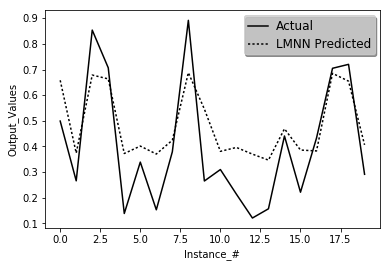

In [38]:

# Create plots with pre-defined labels.
# Alternatively, you can pass labels explicitly when calling `legend`.
fig, ax = plt.subplots()
ax.plot(a, b, 'k', label='Actual')
ax.plot(a, lm_err, 'k:', label='LMNN Predicted')

# Now add the legend with some customizations.
legend = ax.legend(loc='upper right', shadow=True)

# The frame is matplotlib.patches.Rectangle instance surrounding the legend.
frame = legend.get_frame()
frame.set_facecolor('0.80')
plt.ylabel("Output_Values")
plt.xlabel("Instance_#")

# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')

for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.show()

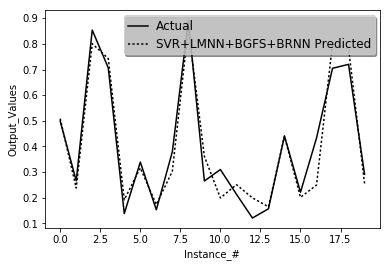

In [39]:

# Create plots with pre-defined labels.
# Alternatively, you can pass labels explicitly when calling `legend`.
fig, ax = plt.subplots()
ax.plot(a, b, 'k', label='Actual')
ax.plot(a, br_err, 'k:', label='SVR+LMNN+BGFS+BRNN Predicted')

# Now add the legend with some customizations.
legend = ax.legend(loc='upper right', shadow=True)

# The frame is matplotlib.patches.Rectangle instance surrounding the legend.
frame = legend.get_frame()
frame.set_facecolor('0.80')
plt.ylabel("Output_Values")
plt.xlabel("Instance_#")
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')

for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.show()

# MSE Error

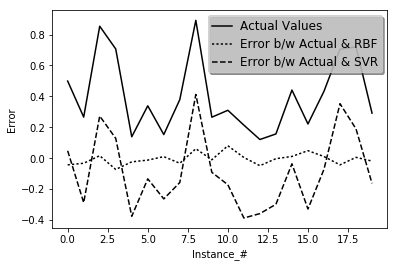

In [40]:
# Create plots with pre-defined labels.
# Alternatively, you can pass labels explicitly when calling `legend`.
error_1 = []
error_2 = []
for i in range(len(actual_err)):
    error_1.append(actual_err[i] - rbf_err[i])
    error_2.append(actual_err[i] - svr_err[i])
#print(error_1)
fig, ax = plt.subplots()
ax.plot(a, actual_err, 'k', label='Actual Values')
ax.plot(a, error_1, 'k:', label='Error b/w Actual & RBF')
ax.plot(a, error_2, 'k--', label='Error b/w Actual & SVR')
# Now add the legend with some customizations.
legend = ax.legend(loc='upper right', shadow=True)

# The frame is matplotlib.patches.Rectangle instance surrounding the legend.
frame = legend.get_frame()
frame.set_facecolor('0.80')
plt.ylabel("Error")
plt.xlabel("Instance_#")

# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')

for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.show()

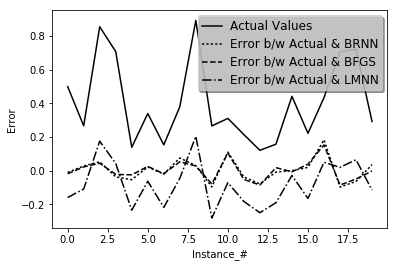

In [41]:
# Create plots with pre-defined labels.
# Alternatively, you can pass labels explicitly when calling `legend`.
error_1 = []
error_2 = []
error_3 = []
for i in range(len(actual_err)):
    error_1.append(actual_err[i] - br_err[i])
    error_2.append(actual_err[i] - bfgs_err[i])
    error_3.append(actual_err[i] - lm_err[i])
#print(error_1)
fig, ax = plt.subplots()
ax.plot(a, actual_err, 'k', label='Actual Values')
ax.plot(a, error_1, 'k:', label='Error b/w Actual & BRNN')
ax.plot(a, error_2, 'k--', label='Error b/w Actual & BFGS')
ax.plot(a, error_3, 'k-.', label='Error b/w Actual & LMNN')
# Now add the legend with some customizations.
legend = ax.legend(loc='upper right', shadow=True)
plt.ylabel("Error")
plt.xlabel("Instance_#")
# The frame is matplotlib.patches.Rectangle instance surrounding the legend.
frame = legend.get_frame()
frame.set_facecolor('0.80')

# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')

for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.show()

# PAD %

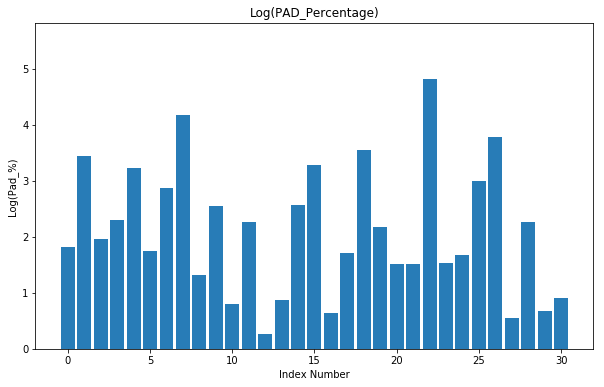

In [42]:

plt.ioff()
pad_percentage = []
ind = []
for i in range(2,len(y_test),94):
    a = y_test[i] - y_pred_brnn[i]
    a = a/float(y_test[i])
    a = a*100
    a = abs(np.log(abs(a)))
    pad_percentage.append(a)
    ind.append(i+1)
fig = plt.figure()

width = .85
ind = np.arange(len(ind))
plt.figure(figsize=(10,6),facecolor='w')
plt.bar(ind, pad_percentage, width=width,align='center', alpha=0.96)
plt.title("Log(PAD_Percentage)")
plt.xlabel("Index Number")
plt.ylabel("Log(Pad_%)")
plt.ylim(0,max(pad_percentage)+1)

#plt.savefig("Bar_chart_1.pdf")
plt.show()

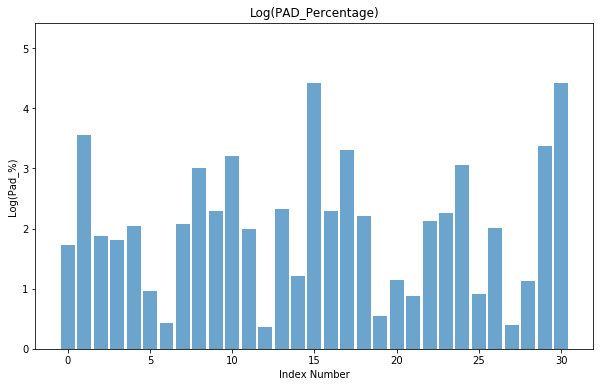

In [43]:

pad_percentage = []
ind = []
for i in range(200,len(y_test),87):
    a = y_test[i] - y_pred_brnn[i]
    a = a/float(y_test[i])
    a = a*100
    a = abs(np.log(abs(a)))
    pad_percentage.append(a)
    ind.append(i+1)
fig = plt.figure()

width = .85
ind = np.arange(len(ind))
plt.figure(figsize=(10,6),facecolor='w')
plt.bar(ind, pad_percentage, width=width,align='center', alpha=0.66)
plt.title("Log(PAD_Percentage)")
plt.xlabel("Index Number")
plt.ylabel("Log(Pad_%)")
plt.ylim(0,max(pad_percentage)+1)

#plt.savefig("Bar_chart_2.pdf")

plt.show()